In [ ]:
# importing all the necessary libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as scp;
from sklearn.feature_selection import RFE;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import ExtraTreesRegressor;
from sklearn.metrics import r2_score;
import statsmodels.api as apl;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import cross_val_score;
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge;
from numpy import absolute;
from sklearn.model_selection import GridSearchCV;
from numpy import arange;
from sklearn.linear_model import Lasso;
from sklearn.linear_model import ElasticNet;

In [2]:
# getting the data

In [3]:
df = pd.read_csv("car data.csv");
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
(301, 9)
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.1000

In [4]:
# DATA PREPROCESSING

feature having na:-  []
numerical features are  ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'] count of numerical featuers are  5
categorical_feature are  ['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Name'] count of categorical_feature are  4
descrete features are  ['Year', 'Owner'] count of descrete_features are  2


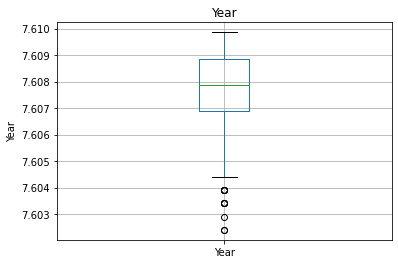

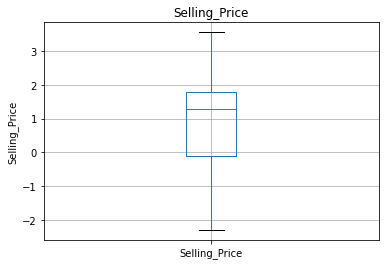

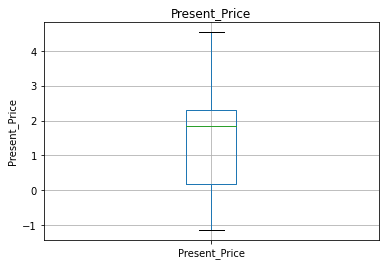

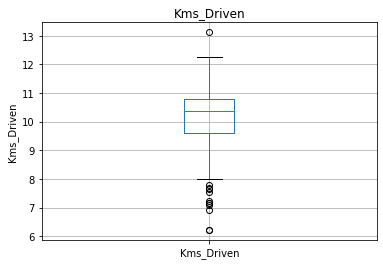

In [5]:
feature_having_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('feature having na:- ', feature_having_na);
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O' ]
print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))
categorical_feature = list(set(df.columns)-set(numerical_feature))
print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

descrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))
for feature in numerical_feature:
 data = df.copy()
 if 0 in data[feature].unique():
     pass
 else:
     data[feature] = np.log(data[feature])
     data.boxplot(column = feature)
     plt.ylabel(feature)
     plt.title(feature)
     plt.show()

In [6]:
# EXPLORATARY DATA ANALYSIS

In [7]:
print(df[df.duplicated()])
df = df.drop_duplicates();
print(df)
print(df.isnull().sum())
df=df.drop(["Car_Name"],axis=1);
print(df);


    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
17      Dealer       Manual      0  
93      Dealer    Automatic      0  
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   


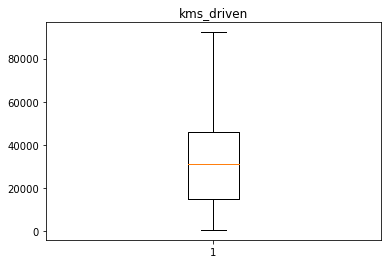

In [8]:
# Removing Outliers
Q1= np.percentile(df["Kms_Driven"],25)
Q3= np.percentile(df["Kms_Driven"],75)
IQR = Q3-Q1
lwr_bound=Q1-(1.5*IQR)
upr_bound=Q3+(1.5*IQR)
outliers=[]
for i in df["Kms_Driven"]:
    if (i<lwr_bound) or (i>upr_bound):
        outliers.append(i)
df.drop(df[df["Kms_Driven"]>upr_bound].index,inplace=True)
df.drop(df[df["Kms_Driven"]<lwr_bound].index,inplace=True)
plt.boxplot(df["Kms_Driven"])
plt.title("kms_driven")
plt.show()

In [9]:
print(df["Seller_Type"])
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True);
print(df.columns)

0      Dealer
1      Dealer
2      Dealer
3      Dealer
4      Dealer
        ...  
296    Dealer
297    Dealer
298    Dealer
299    Dealer
300    Dealer
Name: Seller_Type, Length: 291, dtype: object
Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


Present Price Skeweness 4.500179543280087
Mean of Present Price 7.35450171821306


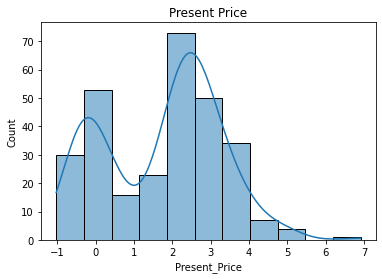

In [10]:
print("Present Price Skeweness",df["Present_Price"].skew())
print("Mean of Present Price",np.mean(df["Present_Price"]))
df["Present_Price"],lam=scp.boxcox(df["Present_Price"])
sns.histplot(df["Present_Price"],kde=True)
plt.title("Present Price")
plt.show()



Selling Price Skeweness 2.5929190596180125
Mean of Selling Price 4.581030927835055
selling price skewness -0.0659032242021267


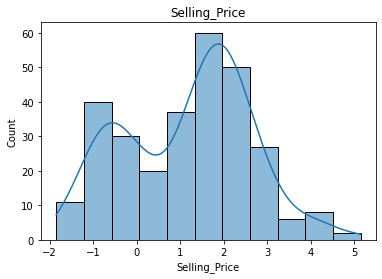

In [11]:
print("Selling Price Skeweness",scp.skew(df["Selling_Price"]))
print("Mean of Selling Price",np.mean(df["Selling_Price"]))
df["Selling_Price"],lam=scp.boxcox(df["Selling_Price"])
print( "selling price skewness",df["Selling_Price"].skew())
sns.histplot(df["Selling_Price"],kde=True)
plt.title("Selling_Price")
plt.show()

Kms Driven Skeweness 0.5607208511803912
Mean of Kms Driven 32591.31271477663


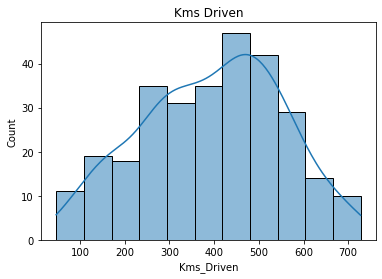

Kms Driven Skeweness -0.1439023176769812


In [12]:
print("Kms Driven Skeweness",scp.skew(df["Kms_Driven"]))
print("Mean of Kms Driven",np.mean(df["Kms_Driven"]))

df["Kms_Driven"],list1=scp.boxcox(df["Kms_Driven"])
sns.histplot(df["Kms_Driven"],kde=True)
plt.title("Kms Driven")
plt.show()
print("Kms Driven Skeweness",scp.skew(df["Kms_Driven"]))

In [13]:
# Converting Dependent And Independent Variables
x=df.drop(["Selling_Price"],axis=1)
y=df["Selling_Price"]

print(x)
print(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

     Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    2014       2.008689  383.498051      0                 0   
1    2013       2.766295  488.868920      0                 1   
2    2017       2.813909  187.841521      0                 0   
3    2011       1.616291  161.915215      0                 0   
4    2014       2.292554  485.598614      0                 1   
..    ...            ...         ...    ...               ...   
296  2016       3.061621  432.437267      0                 1   
297  2015       2.082008  581.572546      0                 0   
298  2009       2.980393  709.702460      0                 0   
299  2017       3.177192  215.920376      0                 1   
300  2016       2.082008  166.183705      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2           

In [14]:
# Feature Selection
lr= LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
l = rfe.fit(x,y)

print("Num Features: %d" % l.n_features_)
print("Selected Features",x.columns[l.support_])
print("Feature Ranking: %s" % l.ranking_)

Num Features: 5
Selected Features Index(['Year', 'Present_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual'],
      dtype='object')
Feature Ranking: [1 1 4 2 1 1 1 3]


In [15]:
c= ExtraTreesRegressor()
lc=c.fit(x,y)
print(x.columns)
print(lc.feature_importances_)

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')
[0.05211457 0.26248207 0.01687927 0.00186702 0.0250665  0.00408728
 0.61972679 0.0177765 ]


In [16]:
ls= LinearRegression()
reg=ls.fit(x_train,y_train)

y_pre=reg.predict(x_test)

print(r2_score(y_test,y_pre))

0.9736692053555934


In [17]:
l1 = Ridge(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(l1, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('mean absolute error  for ridge regression : %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
l1.fit(x_train,y_train)
l_pre = l1.predict(x_test)
print("r2 score for ridge regression ",r2_score(y_test,l_pre))

mean absolute error  for ridge regression : 0.178 (0.021)
r2 score for ridge regression  0.9729265502543638


In [18]:
l2 = Lasso(alpha = 0.05)
l2.fit(x_train,y_train)
las_pre = l2.predict(x_test)
print("r2 score for lasso regression", r2_score(y_test,las_pre))

r2 score for lasso regression 0.9674632072907533


In [19]:
els=ElasticNet(alpha=0.05)
els.fit(x_train,y_train)
els_pre = els.predict(x_test)
print("r2 score for elastic net ",r2_score(y_test,els_pre))

r2 score for elastic net  0.9680376887589788


In [20]:
def SSE(y_true, y_pred):

     sse= np.sum((y_true-y_pred)**2)

     return sse;

In [21]:
print("sum of squared error for linear regression ", SSE(y_test,y_pre));
print(" sum of squared error for ridge regression ",SSE(y_test,l_pre));
print(" sum of squared error for lasso regression ",SSE(y_test,las_pre));
print("sum of squared error for elasticnet ",SSE(y_test,els_pre));

sum of squared error for linear regression  2.634281507917326
 sum of squared error for ridge regression  2.7085809214500354
 sum of squared error for lasso regression  3.2551646282773903
sum of squared error for elasticnet  3.1976902554441713
